In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
# Load the dataset
df = pd.read_csv("reviews_cleaned.csv")
df = df.sample(n=5000, random_state=42)
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Sentiment,Sentiment_Label,review_length
1501,537219,B0034EFIYC,A1J87P15HH42Z0,Jo,0,0,5,1315267200,Kind Gluten Free Bars,I love these bars. I'm on a glutten-free diet ...,positive,1,22
2586,448106,B006EQ0J50,A3B1360JOYS0GJ,ExpectoPatronum,3,3,4,1326067200,Individually boxed and very fresh.,I had been craving fruitcake during the holida...,positive,1,185
2653,557175,B004PX9JPU,A24J6PQ0FN55A6,WestGrl,1,2,3,1303516800,Flawed design,I loved the idea of popcorn that would pop in ...,neutral,0,192
1055,330358,B005ATVY88,AC5UIM0EA1BNZ,PalFam,4,4,4,1322611200,Good results but contains soy,I received Hill's Science Diet Ideal Balance D...,positive,1,758
705,128973,B004ASBLJ2,A3SX8T79S8PPQR,chucklelite,0,0,5,1330128000,Simply delicious,This is a great snack with the perfect amount ...,positive,1,22


In [16]:
#Information about the dataset
df.info()
#Summary statistics of the dataset
df.describe()
#returns  number of columns and rows
print(df.shape)
#check for missing values
df.isnull().sum()
#fill the empty rows
df['Summary'] = df['Summary'].fillna("No Summary")


<class 'pandas.core.frame.DataFrame'>
Index: 5000 entries, 1501 to 860
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Id                      5000 non-null   int64 
 1   ProductId               5000 non-null   object
 2   UserId                  5000 non-null   object
 3   ProfileName             5000 non-null   object
 4   HelpfulnessNumerator    5000 non-null   int64 
 5   HelpfulnessDenominator  5000 non-null   int64 
 6   Score                   5000 non-null   int64 
 7   Time                    5000 non-null   int64 
 8   Summary                 5000 non-null   object
 9   Text                    5000 non-null   object
 10  Sentiment               5000 non-null   object
 11  Sentiment_Label         5000 non-null   int64 
 12  review_length           5000 non-null   int64 
dtypes: int64(7), object(6)
memory usage: 546.9+ KB
(5000, 13)


In [17]:
# Check for duplicates
print(df.duplicated().sum())
#Removes duplicated rows
data_cleaned = df.drop_duplicates()


0


In [18]:
#Handling the Outliers

#calucte the review length(Number of words in the review)
df['review_length'] = df['Text'].apply(lambda x: len(str(x).split()))

df.head()




,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Sentiment,Sentiment_Label,review_length
1501,537219,B0034EFIYC,A1J87P15HH42Z0,Jo,0,0,5,1315267200,Kind Gluten Free Bars,I love these bars. I'm on a glutten-free diet ...,positive,1,22
2586,448106,B006EQ0J50,A3B1360JOYS0GJ,ExpectoPatronum,3,3,4,1326067200,Individually boxed and very fresh.,I had been craving fruitcake during the holida...,positive,1,185
2653,557175,B004PX9JPU,A24J6PQ0FN55A6,WestGrl,1,2,3,1303516800,Flawed design,I loved the idea of popcorn that would pop in ...,neutral,0,192
1055,330358,B005ATVY88,AC5UIM0EA1BNZ,PalFam,4,4,4,1322611200,Good results but contains soy,I received Hill's Science Diet Ideal Balance D...,positive,1,758
705,128973,B004ASBLJ2,A3SX8T79S8PPQR,chucklelite,0,0,5,1330128000,Simply delicious,This is a great snack with the perfect amount ...,positive,1,22


In [19]:
def score_to_sentiment(score):
    if score <= 2:
        return 'negative'
    elif score == 3:
        return 'neutral'
    else:
        return 'positive'

In [20]:
df['Sentiment'] = df['Score'].apply(score_to_sentiment)

In [21]:
print(df['Sentiment'].value_counts())
print(df.head())

Sentiment
positive    3919
negative     703
neutral      378
Name: count, dtype: int64
          Id   ProductId          UserId      ProfileName  \
1501  537219  B0034EFIYC  A1J87P15HH42Z0               Jo   
2586  448106  B006EQ0J50  A3B1360JOYS0GJ  ExpectoPatronum   
2653  557175  B004PX9JPU  A24J6PQ0FN55A6          WestGrl   
1055  330358  B005ATVY88   AC5UIM0EA1BNZ           PalFam   
705   128973  B004ASBLJ2  A3SX8T79S8PPQR      chucklelite   

      HelpfulnessNumerator  HelpfulnessDenominator  Score        Time  \
1501                     0                       0      5  1315267200   
2586                     3                       3      4  1326067200   
2653                     1                       2      3  1303516800   
1055                     4                       4      4  1322611200   
705                      0                       0      5  1330128000   

                                 Summary  \
1501               Kind Gluten Free Bars   
2586  Individually 

In [22]:
# Map sentiment to numbers
sentiment_map = {'negative': -1, 'neutral': 0, 'positive': 1}
df['Sentiment_Label'] = df['Sentiment'].map(sentiment_map)

# Reorder columns to place Sentiment_Label next to Sentiment
sentiment_col = df.pop('Sentiment_Label')
df.insert(df.columns.get_loc('Sentiment') + 1, 'Sentiment_Label', sentiment_col)

# Preview
print(df[['Sentiment', 'Sentiment_Label']].head())


     Sentiment  Sentiment_Label
1501  positive                1
2586  positive                1
2653   neutral                0
1055  positive                1
705   positive                1


In [23]:
df.to_csv('reviews_cleaned.csv', index=False)

In [24]:

for column in df.columns:
    print(f"Unique values in '{column}':")
    print(df[column].value_counts())
    print("-" * 50)

Unique values in 'Id':
Id
537219    1
154797    1
396758    1
40887     1
56943     1
         ..
40099     1
157808    1
316747    1
331017    1
365269    1
Name: count, Length: 5000, dtype: int64
--------------------------------------------------
Unique values in 'ProductId':
ProductId
B007JFMH8M    13
B001RVFEP2    10
B000VK8AVK    10
B000PDWBKO     9
B000NMJWZO     8
              ..
B0017SZTRI     1
B002FZLJWG     1
B001QWBU3M     1
B003N891CY     1
B001SITWC0     1
Name: count, Length: 3805, dtype: int64
--------------------------------------------------
Unique values in 'UserId':
UserId
A1YUL9PCJR3JTY    8
AY12DBB0U420B     5
A281NPSIMI1C2R    4
A2YNIKQDLZR2WW    4
A29JUMRL1US6YP    4
                 ..
AW3QYMTY9QG5O     1
A1QBWKAL3OI8CF    1
A315NLROEI1UZV    1
A1VXZ3EN7JSQYM    1
AJMY77NAPOLQ1     1
Name: count, Length: 4810, dtype: int64
--------------------------------------------------
Unique values in 'ProfileName':
ProfileName
O. Brown "Ms. O. Khannah-Brown"           8


In [25]:
import string
import re  

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk
nltk.download('stopwords')
from nltk.stem import PorterStemmer
from num2words import num2words 



[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\perei\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [26]:
# Initialize stopwords and stemmer
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()

In [27]:
def clean_text(text):
    text = str(text).lower()  # Convert to lowercase
    text = re.sub(r'\d+', lambda match: num2words(int(match.group())), text)  # Convert digits to words
    text = text.translate(str.maketrans('', '', string.punctuation))  # Remove punctuation
    text = " ".join([word for word in text.split() if word not in stop_words])  # Remove stopwords
    return text

# Apply the function to the 'Text' column (adjusting the column name)
df['clean_review'] = df['Text'].apply(clean_text)

# Verify the output
print(df[['Text', 'clean_review']].head())  # Check the first few rows

                                                   Text  \
1501  I love these bars. I'm on a glutten-free diet ...   
2586  I had been craving fruitcake during the holida...   
2653  I loved the idea of popcorn that would pop in ...   
1055  I received Hill's Science Diet Ideal Balance D...   
705   This is a great snack with the perfect amount ...   

                                           clean_review  
1501  love bars im gluttenfree diet bothbr tasty hea...  
2586  craving fruitcake holidays couldnt find time g...  
2653  loved idea popcorn would pop bowl gave try ton...  
1055  received hills science diet ideal balance dog ...  
705   great snack perfect amount salt dont feel guil...  


In [28]:
df.head()


,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Sentiment,Sentiment_Label,review_length,clean_review
1501,537219,B0034EFIYC,A1J87P15HH42Z0,Jo,0,0,5,1315267200,Kind Gluten Free Bars,I love these bars. I'm on a glutten-free diet ...,positive,1,22,love bars im gluttenfree diet bothbr tasty hea...
2586,448106,B006EQ0J50,A3B1360JOYS0GJ,ExpectoPatronum,3,3,4,1326067200,Individually boxed and very fresh.,I had been craving fruitcake during the holida...,positive,1,185,craving fruitcake holidays couldnt find time g...
2653,557175,B004PX9JPU,A24J6PQ0FN55A6,WestGrl,1,2,3,1303516800,Flawed design,I loved the idea of popcorn that would pop in ...,neutral,0,192,loved idea popcorn would pop bowl gave try ton...
1055,330358,B005ATVY88,AC5UIM0EA1BNZ,PalFam,4,4,4,1322611200,Good results but contains soy,I received Hill's Science Diet Ideal Balance D...,positive,1,758,received hills science diet ideal balance dog ...
705,128973,B004ASBLJ2,A3SX8T79S8PPQR,chucklelite,0,0,5,1330128000,Simply delicious,This is a great snack with the perfect amount ...,positive,1,22,great snack perfect amount salt dont feel guil...


# Exploratory data analysis

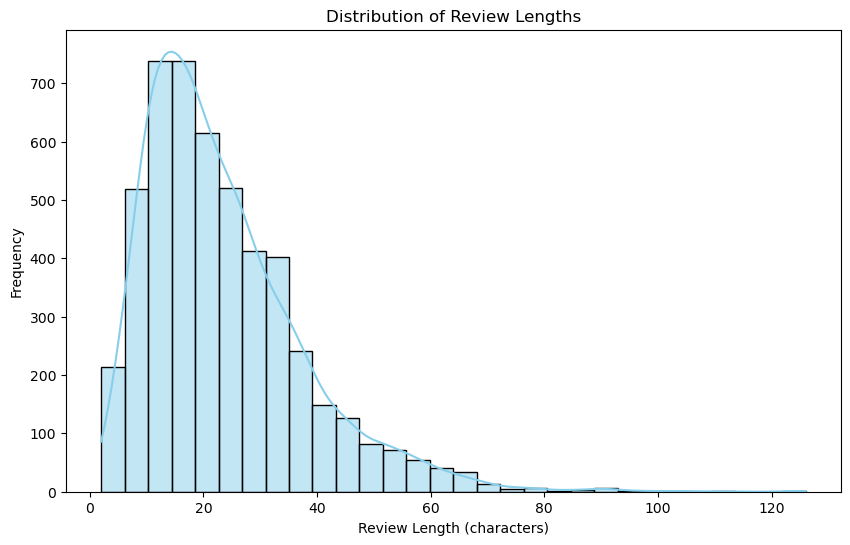

In [29]:
# Visualizing review text lengths
df['review_length'] = df['Summary'].apply(len)

plt.figure(figsize=(10, 6))
sns.histplot(df['review_length'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Review Lengths')
plt.xlabel('Review Length (characters)')
plt.ylabel('Frequency')
plt.show()


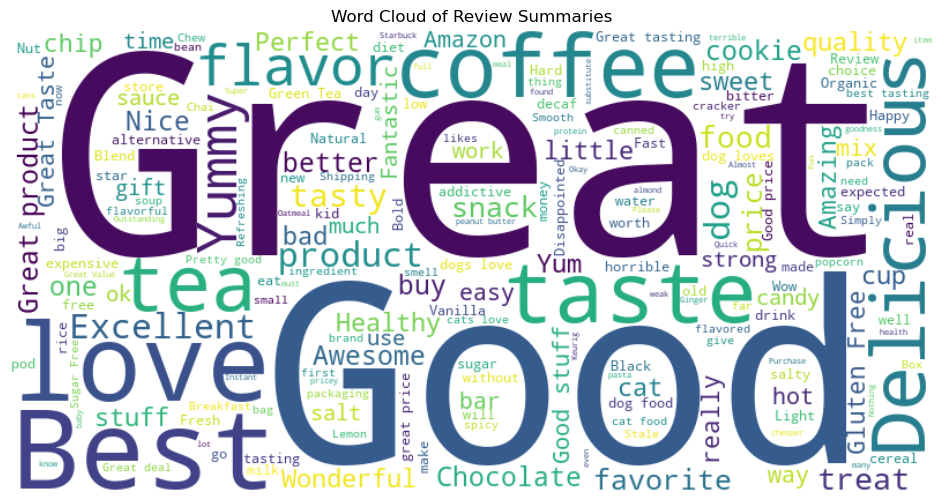

In [30]:
# Word cloud (if text-based)
from wordcloud import WordCloud

text = " ".join(df['Summary'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(15, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Review Summaries')
plt.show()


C:\Users\perei\AppData\Local\Temp\ipykernel_10048\4010540876.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(words), y=list(freqs), palette='viridis')


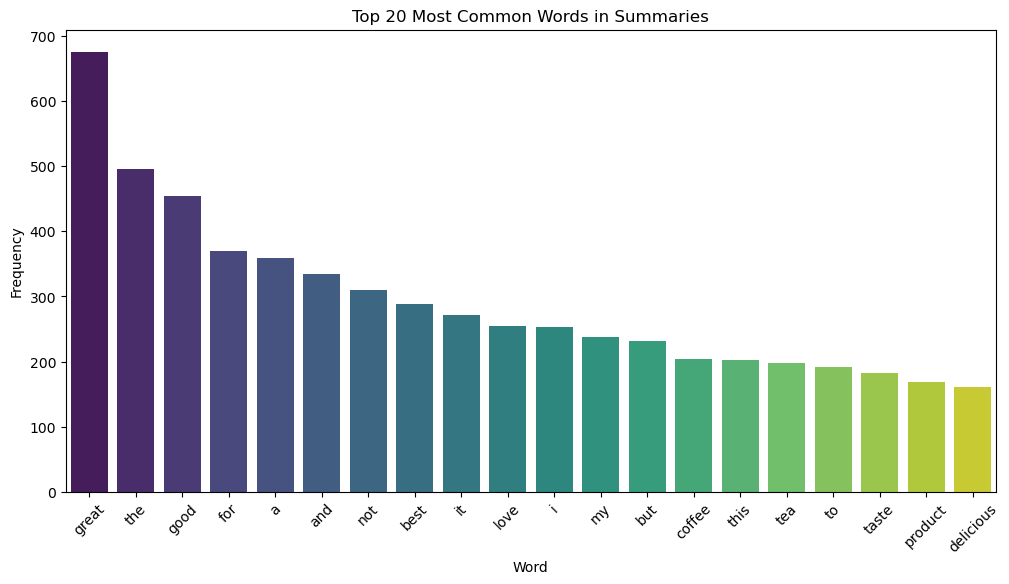

In [33]:
# Top 20 most common words (basic frequency count)
from collections import Counter
import re

words = []
for summary in df['Summary']:
    words += re.findall(r'\b\w+\b', summary.lower())

word_freq = Counter(words)
common_words = word_freq.most_common(20)

words, freqs = zip(*common_words)
plt.figure(figsize=(12, 6))
sns.barplot(x=list(words), y=list(freqs), palette='viridis')
plt.xticks(rotation=45)
plt.title('Top 20 Most Common Words in Summaries')
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.show()


C:\Users\perei\AppData\Local\Temp\ipykernel_10048\1694568810.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(words), y=list(freqs), palette='viridis')


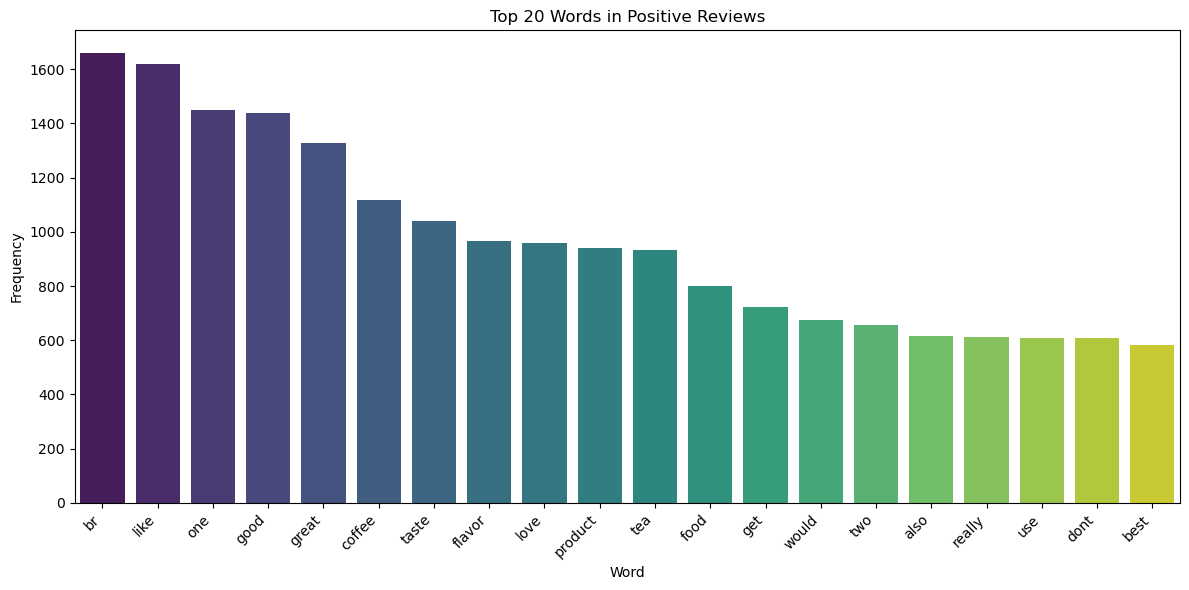

C:\Users\perei\AppData\Local\Temp\ipykernel_10048\1694568810.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(words), y=list(freqs), palette='viridis')


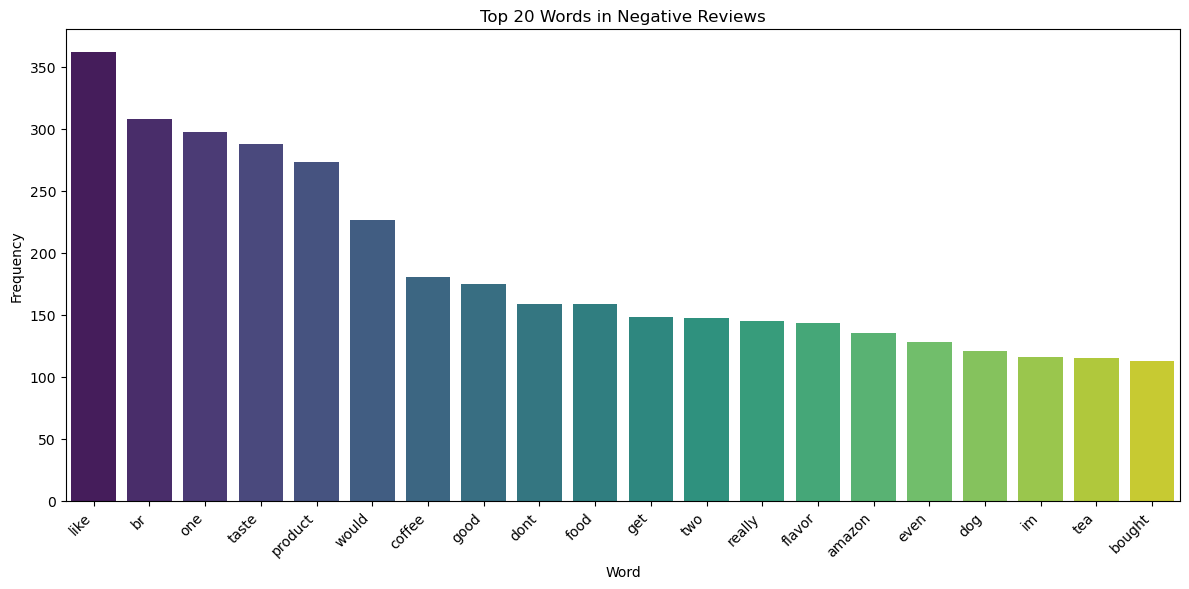

In [ ]:
from collections import Counter

# Function to count word frequencies and display a bar graph
def word_frequency_graph(text_column, title="Top 20 Most Common Words", top_n=20):
    all_words = ' '.join(text_column).split()
    word_counts = Counter(all_words)
    common_words = word_counts.most_common(top_n)

    words, freqs = zip(*common_words)  # Unzip words and frequencies

    plt.figure(figsize=(12, 6))
    sns.barplot(x=list(words), y=list(freqs), palette='viridis')
    plt.xticks(rotation=45, ha='right')  # Rotating x-axis labels for better readability
    plt.title(title)
    plt.xlabel('Word')
    plt.ylabel('Frequency')
    plt.tight_layout()  # Adjusting layout to prevent labels from overlapping
    plt.show()

# Get common words for positive and negative reviews and display graphs
positive_reviews = df[df['Sentiment'] == 'positive']['clean_review']
negative_reviews = df[df['Sentiment'] == 'negative']['clean_review']

word_frequency_graph(positive_reviews, title="Top 20 Words in Positive Reviews")
word_frequency_graph(negative_reviews, title="Top 20 Words in Negative Reviews")

C:\Users\perei\AppData\Local\Temp\ipykernel_10048\278421220.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ngrams_strings, y=freqs, palette='viridis')


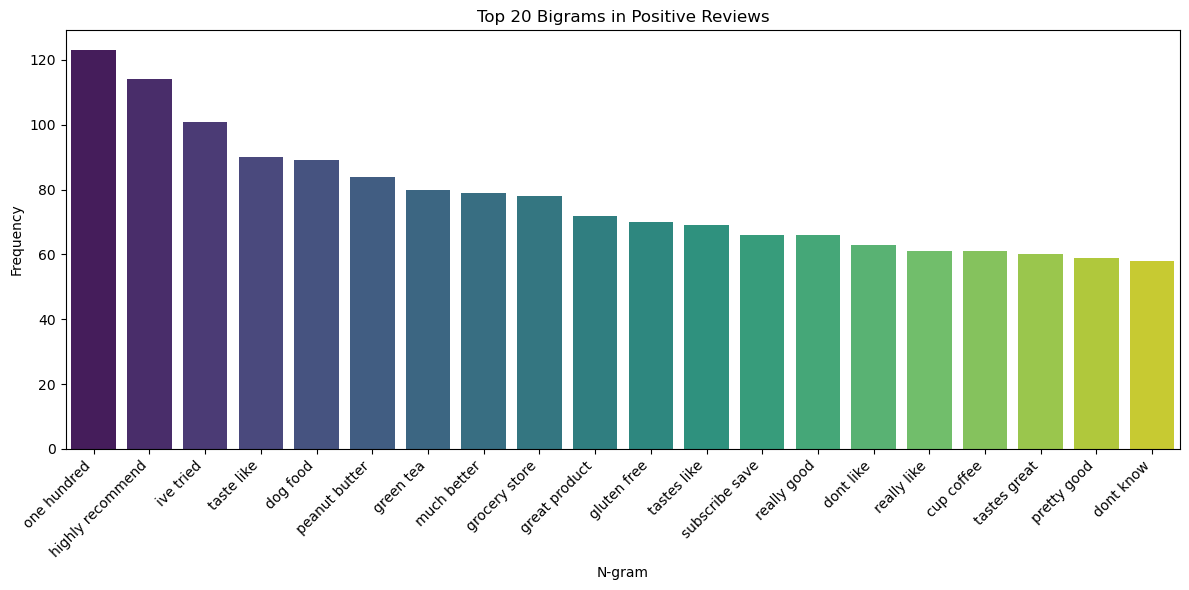

C:\Users\perei\AppData\Local\Temp\ipykernel_10048\278421220.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ngrams_strings, y=freqs, palette='viridis')


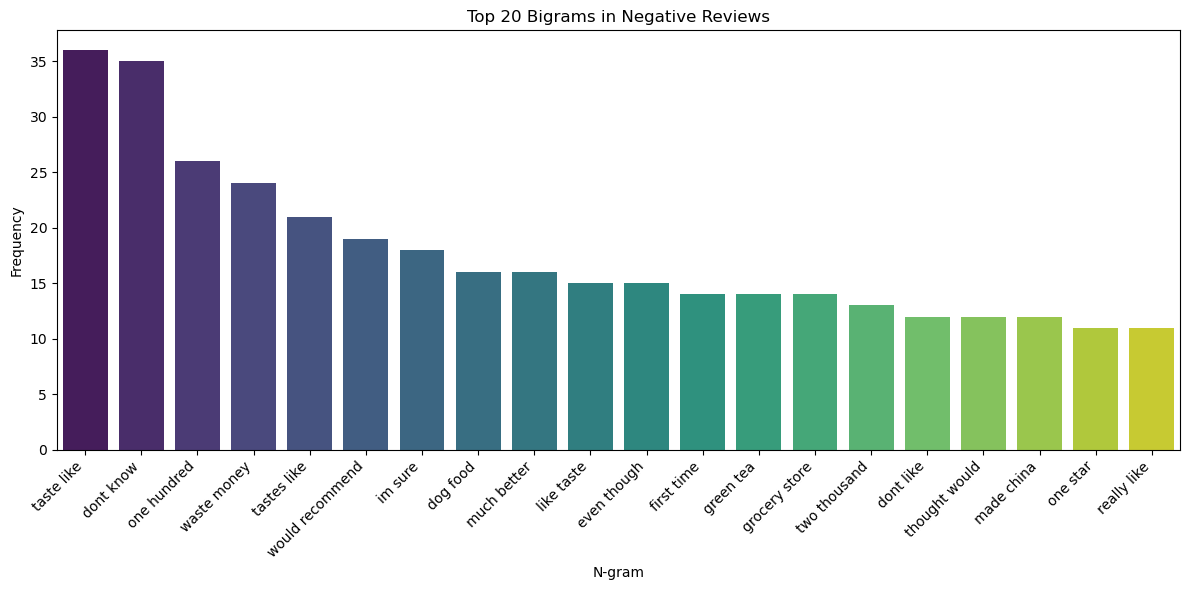

In [47]:
from nltk.util import ngrams

# Function to generate n-grams, count frequencies, and display a bar graph
def n_gram_frequency_graph(text_column, n=2, title=f"Top 20 Bigrams", top_n=20):
    n_grams = []
    for text in text_column:
        words = text.split()
        n_grams.extend(ngrams(words, n))
    n_gram_counts = Counter(n_grams)
    common_n_grams = n_gram_counts.most_common(top_n)

    # Convert n-grams to strings for plotting
    ngrams_strings = [" ".join(ngram) for ngram in dict(common_n_grams).keys()]
    freqs = list(dict(common_n_grams).values())

    plt.figure(figsize=(12, 6))
    sns.barplot(x=ngrams_strings, y=freqs, palette='viridis')
    plt.xticks(rotation=45, ha='right')
    plt.title(title)
    plt.xlabel("N-gram")
    plt.ylabel("Frequency")
    plt.tight_layout()
    plt.show()

# Get common bigrams (2-word phrases) and display graphs
positive_bigrams = df[df['Sentiment'] == 'positive']['clean_review']
negative_bigrams = df[df['Sentiment'] == 'negative']['clean_review']

n_gram_frequency_graph(positive_bigrams, n=2, title="Top 20 Bigrams in Positive Reviews")
n_gram_frequency_graph(negative_bigrams, n=2, title="Top 20 Bigrams in Negative Reviews")

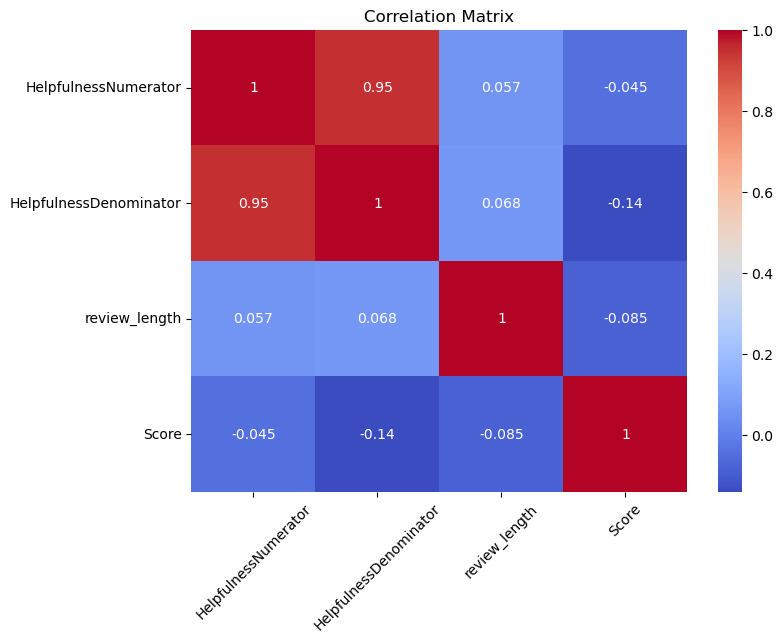

In [42]:
# Calculate the correlation matrix
correlation_matrix = df[['HelpfulnessNumerator', 'HelpfulnessDenominator', 'review_length', 'Score']].corr()

# Visualize the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.xticks(rotation=45)
plt.show()

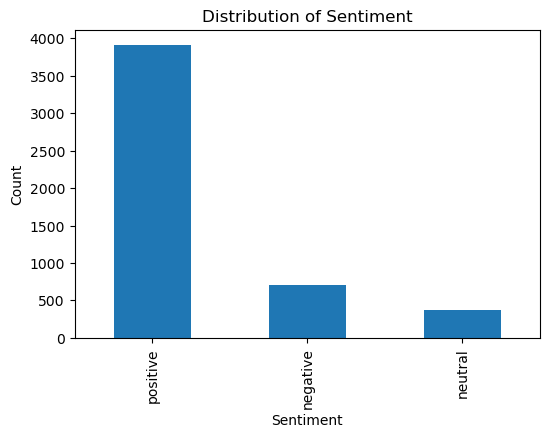

In [44]:
# Visualize the distribution of sentiment
plt.figure(figsize=(6, 4))
df['Sentiment'].value_counts().plot(kind='bar')
plt.title('Distribution of Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

Word Cloud for Positive Reviews


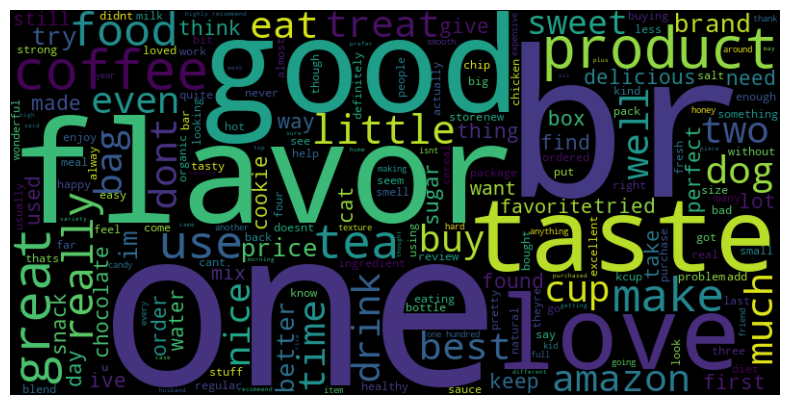

Word Cloud for Negative Reviews


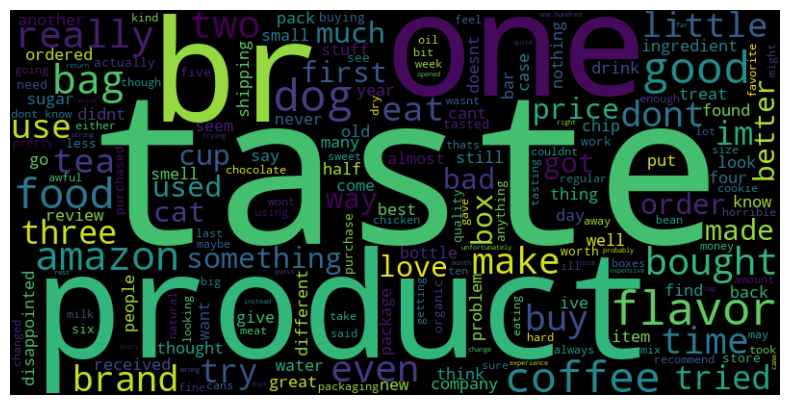

In [45]:
from wordcloud import WordCloud

# Function to generate word clouds
def generate_word_cloud(text_column):
    text = ' '.join(text_column)
    wordcloud = WordCloud(width=800, height=400).generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

# Generate word clouds for positive and negative reviews
print("Word Cloud for Positive Reviews")
generate_word_cloud(positive_reviews)

print("Word Cloud for Negative Reviews")
generate_word_cloud(negative_reviews)

In [35]:
# Step 1: Import libraries
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
